# Auto Regression using Statsmodels - Sample 1

In [136]:
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline

In [137]:
#Step 1: import libs and read CSV data
df = pd.read_csv("function-data.csv", index_col='day',parse_dates=True)

In [138]:
#df.index.freq = 'D'
df=df.asfreq(freq='D')
df.head()

,sales
day,
2016-01-01,13.21
2016-01-02,12.67
2016-01-03,14.30
2016-01-04,15.13
2016-01-05,17.68


In [139]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='day', length=1096, freq='D')

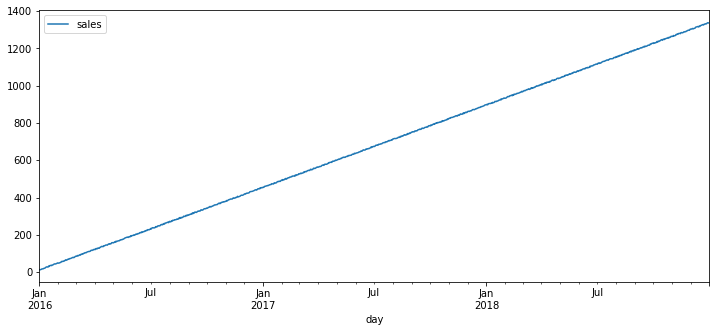

In [140]:
df.plot(figsize=(12,5))

In [141]:
## Step 2 : Import AR and AR
from statsmodels.tsa.ar_model import AR,ARResults

## Auto Regession function `AR()`

In [142]:
## Step 3: Split the data into Test and Training.
# 1096 Days = 366 days in 2016, 365 in 2017 and 365 in 2018
# train set = 366 + 365 = 0-731
# test set = 731-(356+731)

train = df.iloc[:731]
test  = df.iloc[731:]


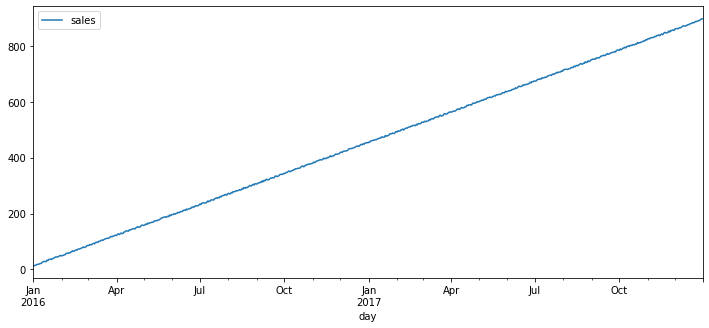

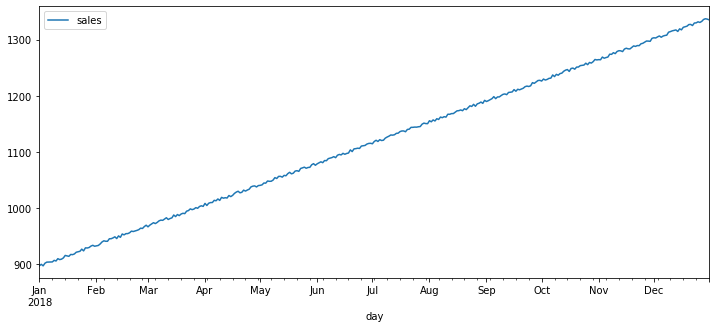

In [143]:
train.plot(figsize=(12,5));
test.plot(figsize=(12,5));


In [144]:
# Step 4: Create model
model = AR(df['sales'])

In [145]:
# Step 5: Fit the model:
# There are many params, Most important is the maxlag param in AR()
# Other is the SOLVER function  i.e. `method='cmle|lbgf'`
# and the `ic`
ar_order1_fit = model.fit(maxlag=1)

# Step 6: Check the Auto regression lag window
ar_order1_fit.params


const       1.221819
L1.sales    0.999978
dtype: float64

In [146]:
# Step 7: Predict on existing data

#find indices of test data: i.i 731 to 1095
start = len(train)
end   = len(train) + len(test) - 1

AR1_Prediction = ar_order1_fit.predict(start=start, end=end) # Gives a Series
type(AR1_Prediction)

pandas.core.series.Series

In [147]:
# give some names to series to help with plotting legend
AR1_Prediction = AR1_Prediction.rename('AR(order1) Prediction')
AR1_Prediction

day
2018-01-01     898.522325
2018-01-02     898.702321
2018-01-03     901.192267
2018-01-04     898.452326
2018-01-05     903.132225
                 ...     
2018-12-27    1331.572917
2018-12-28    1333.422877
2018-12-29    1336.842802
2018-12-30    1338.162774
2018-12-31    1337.542787
Freq: D, Name: AR(order1) Prediction, Length: 365, dtype: float64

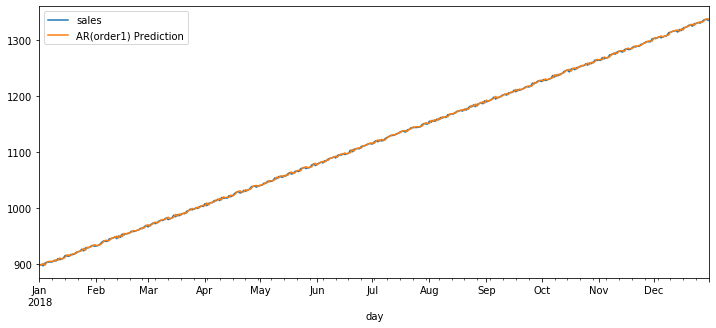

In [148]:
# Plot the test and prediction
test.plot(figsize=(12,5),legend=True)
AR1_Prediction.plot(legend=True)

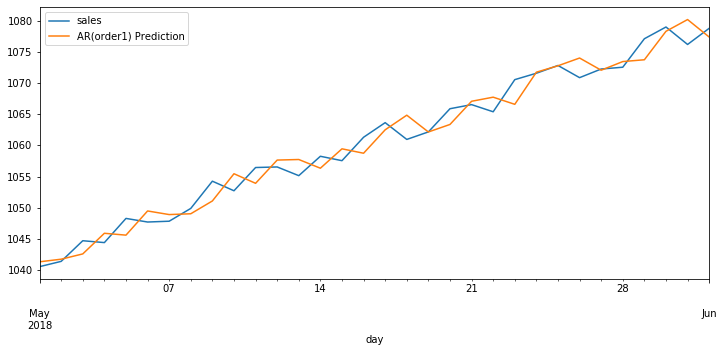

In [149]:
# Zoom Into the Plot 
test['2018-05-01':'2018-06-01'].plot(figsize=(12,5),legend=True)
AR1_Prediction['2018-05-01':'2018-06-01'].plot(legend=True)

# Now Auto Regress with ORDER = 2

In [150]:
ar_order2_fit = model.fit(maxlag=2)
ar_order2_fit.params

const       1.836621
L1.sales    0.491755
L2.sales    0.508226
dtype: float64

In [151]:
AR2_Prediction = ar_order2_fit.predict(start=start, end=end) # Gives a Series
AR2_Prediction = AR2_Prediction.rename('AR(order2) Prediction')



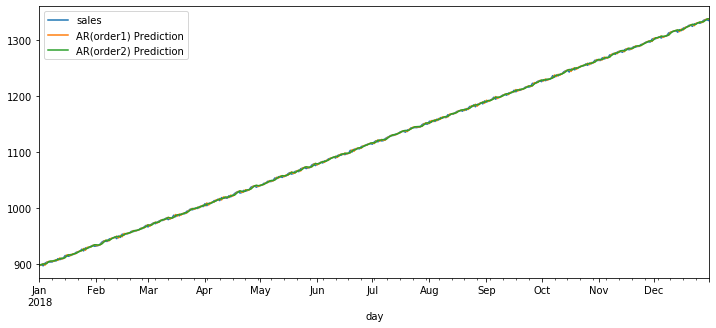

In [152]:
# Plot test, AR1, AR2
test.plot(figsize=(12,5),legend=True)
AR1_Prediction.plot(legend=True)
AR2_Prediction.plot(legend=True)

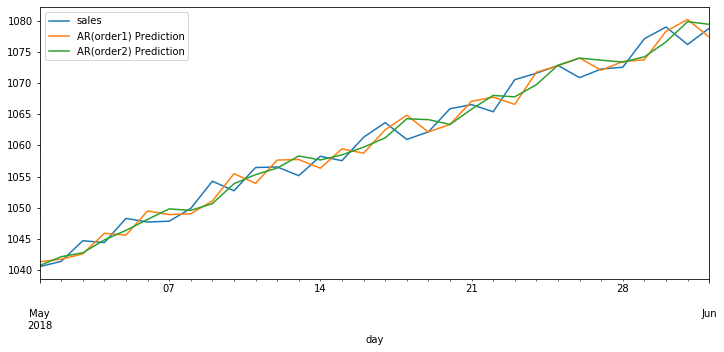

In [153]:
# Zoom in to Plot test, AR1, AR2
test['2018-05-01':'2018-06-01'].plot(figsize=(12,5),legend=True)
AR1_Prediction['2018-05-01':'2018-06-01'].plot(legend=True)
AR2_Prediction['2018-05-01':'2018-06-01'].plot(legend=True)


# How to find the best Order for Auto Regression?
#### Let AR model find the best order by using `ic=aic | bic | hic | t-stat ` parameter

In [178]:
ar_orderx_fit = model.fit(ic='t-stat') # aic | bic | hic | t-stat 

In [179]:
AR18_Prediction = ar_orderx_fit.predict(start=start, end=end) # Gives a Series
AR18_Prediction = AR18_Prediction.rename('AR(order18) Prediction')

In [180]:
# find the order
ar_orderx_fit.params
# Thus the best order is about maxlag = 18. This means that the AR model can predict in future best by 
# just looking back into 18 days back in time. 

const        11.419102
L1.sales      0.023021
L2.sales      0.036934
L3.sales     -0.010519
L4.sales      0.098932
L5.sales      0.078266
L6.sales      0.106001
L7.sales      0.086114
L8.sales      0.078530
L9.sales      0.106476
L10.sales    -0.015201
L11.sales     0.052265
L12.sales     0.094524
L13.sales     0.021818
L14.sales     0.055483
L15.sales     0.046360
L16.sales     0.018823
L17.sales     0.043307
L18.sales     0.078888
dtype: float64

In [181]:
# Step 7: Evaluate all the models:
from sklearn.metrics import mean_squared_error

label = ['AR1','AR2','AR18']
predictions = [AR1_Prediction, AR2_Prediction, AR18_Prediction]


for i in range(3) :
    error = mean_squared_error(test['sales'],predictions[i])
    print(f"{label[i]} MSE is was {error}")

    
'''
AR1 MSE is was 4.7471024198340555
AR2 MSE is was 3.3003617936586647

MSE for ic='t-stat':  AR18 MSE is was 2.371880613581776
MSE for ic='aic'   :  AR18 MSE is was 2.371880613581776
MSE for ic='bic'   :  AR12 MSE is was 2.441688718873439

'''    

AR1 MSE is was 4.7471024198340555
AR2 MSE is was 3.3003617936586647
AR18 MSE is was 2.371880613581776


"\nAR1 MSE is was 4.7471024198340555\nAR2 MSE is was 3.3003617936586647\n\nMSE for ic='t-stat':  AR18 MSE is was 2.371880613581776\nMSE for ic='aic'   :  AR18 MSE is was 2.371880613581776\nMSE for ic='bic'   :  AR12 MSE is was 2.441688718873439\n\n"

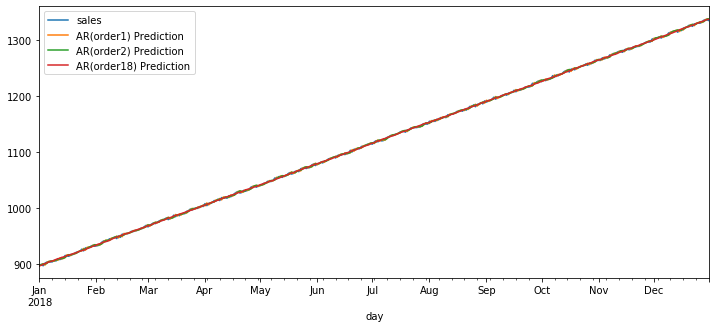

In [158]:
#Plot all 

test.plot(figsize=(12,5),legend=True)
AR1_Prediction.plot(legend=True)
AR2_Prediction.plot(legend=True)
AR18_Prediction.plot(legend=True)



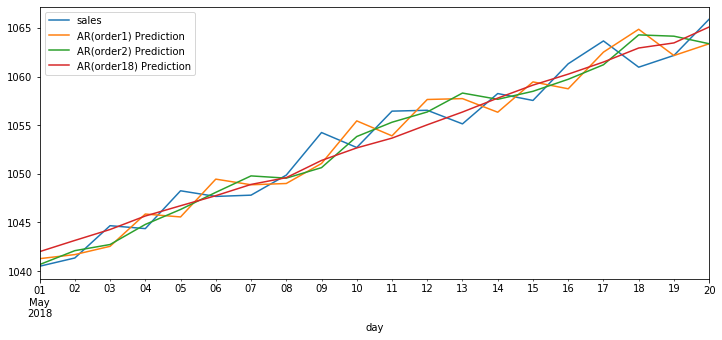

In [188]:
# Zoom in to Plot 
test           ['2018-05-01':'2018-05-20'].plot(figsize=(12,5),legend=True)
AR1_Prediction ['2018-05-01':'2018-05-20'].plot(legend=True)
AR2_Prediction ['2018-05-01':'2018-05-20'].plot(legend=True)
AR18_Prediction['2018-05-01':'2018-05-20'].plot(legend=True)

In [193]:
#step 8 Predict in future unseen data (Forecast)

ARFit = AR(df['sales']).fit(ic='t-stat')
forcasted_values = ARFit.predict(start=len(df),end=len(df)+60) # Predict for 60 days, 2 months in 2019 
forcasted_values

2019-01-01    1339.269280
2019-01-02    1340.386118
2019-01-03    1341.583442
2019-01-04    1342.819371
2019-01-05    1344.025779
                 ...     
2019-02-26    1406.901765
2019-02-27    1408.113157
2019-02-28    1409.324707
2019-03-01    1410.537146
2019-03-02    1411.748454
Freq: D, Length: 61, dtype: float64

In [198]:
forcasted_values.rename('Forecast')

2019-01-01    1339.269280
2019-01-02    1340.386118
2019-01-03    1341.583442
2019-01-04    1342.819371
2019-01-05    1344.025779
                 ...     
2019-02-26    1406.901765
2019-02-27    1408.113157
2019-02-28    1409.324707
2019-03-01    1410.537146
2019-03-02    1411.748454
Freq: D, Name: Forecast, Length: 61, dtype: float64

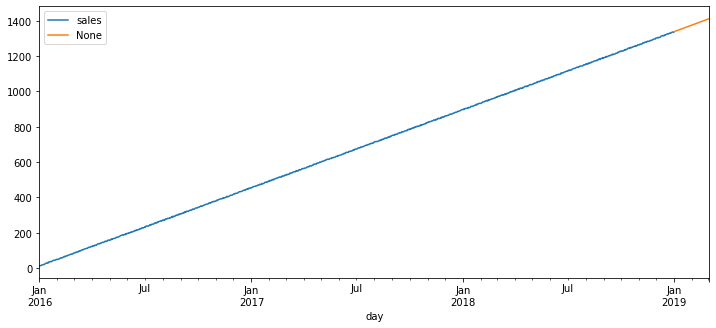

In [199]:
df['sales'].plot(figsize=(12,5),legend=True)
forcasted_values.plot(legend=True)

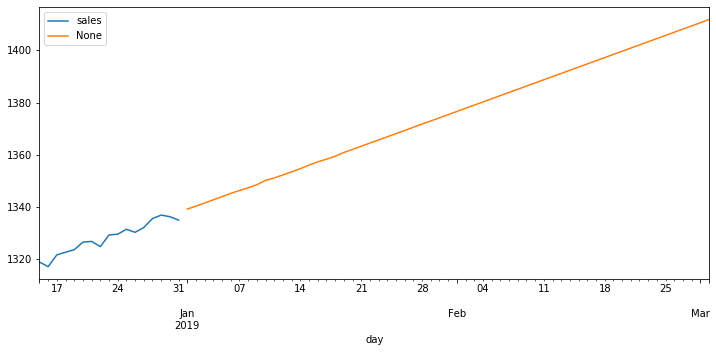

In [200]:
# zoom in

df['2018-12-15':].plot(figsize=(12,5),legend=True)
forcasted_values.plot(legend=True)